In [18]:
# import libraries pandas and sqlite3, load the database into Python as a pandas dataframe.
import pandas as pd
import sqlite3
with sqlite3.connect("hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

In [19]:
# using .columns to see how many columns are in this dataframe.
data.columns

Index(['name', 'age', 'weight', 'eyecolor'], dtype='object')

In [20]:
# using .groupby to see how many people(not repetitive rows) in this dataframe.
data.groupby(by=['name'], as_index=False).count()

,name,age,weight,eyecolor
0,Aaron Akridge,1,1,1
1,Aaron Alexander,1,1,1
2,Aaron Amin,1,1,1
3,Aaron Ardis,1,1,1
4,Aaron Ascolese,1,1,1
...,...,...,...,...
137587,Zoraida Johnson,1,1,1
137588,Zula Francis,1,1,1
137589,Zula Marchant,1,1,1
137590,Zulema Barnes,1,1,1


In [21]:
# using .describe to generate statistical description on the dataframe. Using .loc to locate the data in the 'age' column. 
data.describe().loc[:,'age']

count    152361.000000
mean         39.510528
std          24.152760
min           0.000748
25%          19.296458
50%          38.468955
75%          57.623245
max          99.991547
Name: age, dtype: float64

In [22]:
# import libraries matplotlib and numpy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

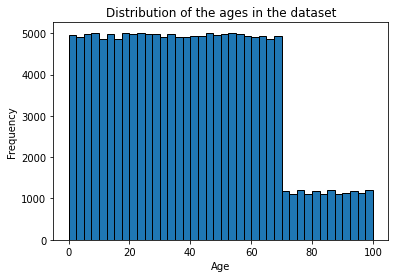

In [23]:
# using matplotlib.pyplot to draw the histagram of ages in the dataset. using .xlabel, .ylabel, .title to set the x-axis label, y-axis label and figure title.
plt.hist(data.age, bins = 40, edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of the ages in the dataset")
plt.show()

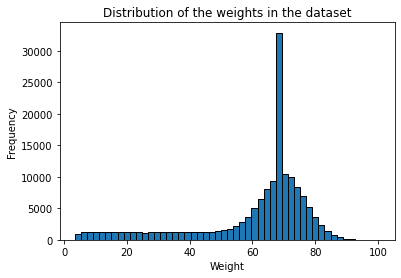

In [24]:
# same as above, using matplotlib.pyplot.hist to draw the histagram of weights in the dataset. using .xlabel, .ylabel, .title to set the x-axis label, y-axis label and figure title.
plt.hist(data.weight, bins = 50, edgecolor = "black")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of the weights in the dataset")
plt.show()

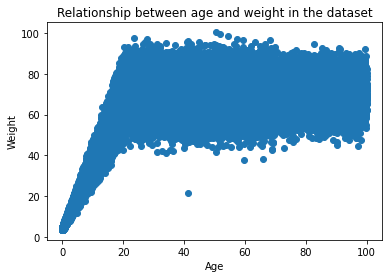

In [25]:
# using matplotlib.pyplot.scatter to draw the scatterplot between ages and weights in the dataset. using .xlabel, .ylabel, .title to set the x-axis label, y-axis label and figure title.
plt.scatter(data.age, data.weight)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("Relationship between age and weight in the dataset")
plt.show()

In [26]:
# transpose the dataframe for further use.
data_transposed = data.T

# define the function find_outlier()
def find_outlier():
    # create a list called name_list(at first is empty), to store the names in the dataframe.
    name_list = []
    # use for loop to go through all the elements in transposed dataframe. 
    for i in range(0,len(data)):
        # use if/else as conditional statements to get the element in which age is among 40-50, weight is among 20-30. save the name of element into name_list.
        if 40 < data_transposed[i]['age'] < 50 and 20 < data_transposed[i]['weight'] < 30:
            name_list.append(data_transposed[i]['name'])
    print(name_list)

find_outlier()

['Anthony Freeman']


In [33]:
# Testing code:
# define the function test_find_outlier(), to test the function find_outlier().
def test_find_outlier():
    # use for loop to travase the whole dataframe, use if/else as conditional statement: if the name is 'Anthony Freeman', print his age and weight.
    for i in range(0,len(data)):
        if data_transposed[i]['name'] == 'Anthony Freeman':
            print(f"His age is {data_transposed[i]['age']:.1f}, and his weight is {data_transposed[i]['weight']:.1f}")

# run the testing code, found two records from Anthony Freeman: 
# the first record showed his age is 41.3, and his weight is 21.7, which is the outlier in the previous scatterplot.
test_find_outlier()
data.describe().loc[:,'age']
data.describe().loc[:,'weight']

His age is 41.3, and his weight is 21.7
His age is 33.3, and his weight is 74.0


count    152361.000000
mean         60.884134
std          18.411824
min           3.382084
25%          58.300135
50%          68.000000
75%          71.529860
max         100.435793
Name: weight, dtype: float64